# Exercise - Sensorfusion and Localization (1D-Kalman Filter)

## Table of Contents
* [Introduction](#Introduction)
* [Requirements](#Requirements) 
  * [Python Modules](#Python-Modules)
  * [Knowledge](#Knowledge)
  * [Modules](#Python-Modules)
* [Exercises](#Exercises)
  * [Exercise - Sensorfusion](#Exercise---Sensorfusion)
  * [Exercise - 1D Kalman Filter](#Exercise-1D-Kalman-Filter)
* [Literature](#Literature)
* [Licenses](#Licenses)

## Introduction

[**TODO**]

## Requirements

### Knowledge

To complete this exercise notebook, you should have knowledge about the following topics:

Kalman Filter 1D
* [Notes](http://christianherta.de/lehre/localization/Kalman-Filter-1D.php) by Christian Herta [HER18]

### Python Modules

In [ ]:
import scipy.stats  
import numpy as np
from matplotlib import pyplot as plt
import hashlib

%matplotlib inline

In [ ]:
def round_and_hash(value, precision=4, dtype=np.float32):
    """ 
    Function to round and hash a scalar or numpy array of scalars.
    Used to compare results with true solutions without spoiling the solution.
    """
    rounded = np.array([value], dtype=dtype).round(decimals=precision)
    hashed = hashlib.md5(rounded).hexdigest()
    return hashed

## Exercises

### Exercise - Sensorfusion

We have three sensors which measure a distance. 

We get the following values from the measurements:

- Sensor 1: $50.1$ cm 
- Sensor 2: $49.3$ cm 
- Sensor 3: $49.7$ cm 

From the calibration of the sensors we have the following estimate of the standard deviations for the sensors
(in the range 30-90 cm):

- Standard deviation of sensor 1: $0.8$ cm
- Standard deviation of sensor 2: $1.2$ cm
- Standard deviation of sensor 3: $0.9$ cm

Assume that the sensors are prefectly calibrated such we have no [systematic error](https://www.physics.umd.edu/courses/Phys276/Hill/Information/Notes/ErrorAnalysis.html) (bias).

Remark:
If you are interesed how to estimate the error of an sensor, then read for an easy explaination https://amloceanographic.com/blog/sensor-accuracy/


**Tasks:**

- What is the distance if we combine of all three measurements?
- Also give an error estimate of the result (the true value should be in at least 0.95 of the Gaussian area), e.g. as $88\pm 4$m
 (How is this related to the standard deviation?)
 
Solve the exercise

1. with pen & paper
2. implement it with numpy. 
3. plot the differnet Gaussians. For the plot you can utilize the following code snippet:

```
h_space = np.arange(45.,55.,.1)
pdf1 = scipy.stats.norm(loc=mu1, scale=sigma1).pdf(h_space)
plt.plot(h_space, pdf1)
```
It should look similar to the following:

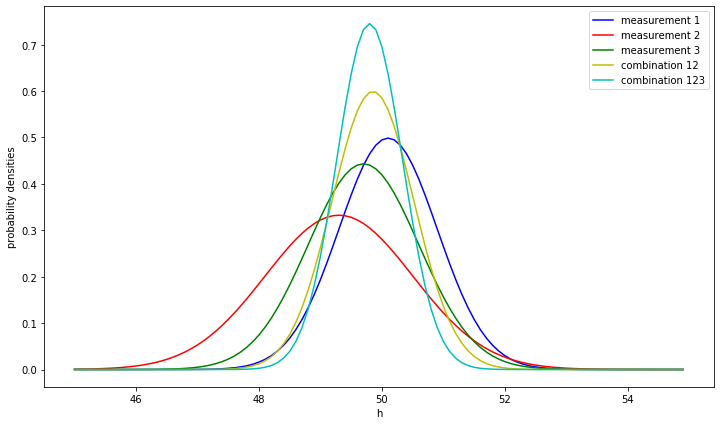
 
**Hint:**

To combine two measurements, we take the product of the gaussians with:

$$\mu_{new} = \frac{\sigma_2^2 \mu_1 + \sigma_1^2 \mu_2}{\sigma_1^2 + \sigma_2^2}$$

and

$$\sigma_{new} = \sqrt{\frac{\sigma_1^2 \sigma_2^2}{\sigma_1^2 + \sigma_2^2}}$$

Take care for the [significant digits](http://www.batesville.k12.in.us/physics/APPhyNet/Measurement/Significant_Digits.html)
 you use.

In [ ]:
def measurement(mu, sigma, mu1, sigma1):
    # product of two gaussians
    raise NotImplementedError()
    return mu_, sigma_

In [ ]:
mu_combined_measure = 42 ### assign your solution
sigma_combined_measure = 42 ### assign your solution

In [ ]:
### Test your solution

assert round_and_hash(mu_combined_measure) == "3ff4d58510b259756d7c9dedf137344f"
assert round_and_hash(sigma_combined_measure) == "f3a60f45efcdfd685302d28d27e4abf3"

### Exercise - 1D Kalman Filter

A robot moves with a velocity of about $3$ m/s. We assume that if the robot moves in a time $\Delta t=2$s we have an standard deviation of the moved distance of $0.8$m.

Each 2 seconds we measure the position with an standard deviation $\sigma$ of $1.2$ m.

We get the following measurements:

 - $z(t=0$s$) = -2$m (inital $\sigma=0$) 
 - $z(t=2$s$) = 3.4$ m 
 - $z(t=4$s$)$ = no measurement
 - $z(t=6$s$)= 16.3$ m

**Task:**

What is the predicted position before the measurement at $t=8$s.

In the state space we use just the position of the robot (1D).
Solve the exercise

1. with pen & paper
2. implement it with numpy

**Hint:**

Again, combining two measurements, use the product of the two guassians, like the exercise above.

For prediction use the formulas for convolution of two gaussians:

$$
\mu_{new} = \mu_1 + \mu_2
$$

and

$$
\sigma_{new} = \sqrt{\sigma_1^2 + \sigma_2^2}
$$

In [ ]:
def predict(mu, sigma, mu1, sigma1):
    # convolution of two gaussians
    raise NotImplementedError()
    return mu_, sigma_

In [ ]:
mu_final = 42 ### assign your solution
sigma_final = 42 ### assign your solution

In [ ]:
### Test your solution

assert round_and_hash(mu_final) == "bd09b7c10823bb776c3869b823dfcab2"
assert round_and_hash(sigma_final) == "90ec900f88662277f26f003ff2018566"

#### Further literature and links for probabilistic robotics

- http://probabilistic-robotics
 - http://probabilistic-robotics.informatik.uni-freiburg.de/ppt/ 
- Course from W. Burgard: [Introduction to Mobile Robotics](http://ais.informatik.uni-freiburg.de/teaching/ss18/robotics/)

## Literature

<table>
    <tr>
        <td>
            <a name="HER18"></a>[HER18]
        </td>
        <td>
            Christian Herta. Visited 2018, October 05. Expectation Maximization http://christianherta.de/lehre/localization/Kalman-Filter-1D.php
        </td>
    </tr>
</table>

## Licenses

### Notebook License (CC-BY-SA 4.0)

*The following license applies to the complete notebook, including code cells. It does however not apply to any referenced external media (e.g., images).*

Exercises - Sensorfusion and Localization (1D-Kalman Filter) <br/>
by Christian Herta<br/>
is licensed under a [Creative Commons Attribution-ShareAlike 4.0 International License](http://creativecommons.org/licenses/by-sa/4.0/).<br/>
Based on a work at https://gitlab.com/deep.TEACHING.


### Code License (MIT)

*The following license only applies to code cells of the notebook.*

Copyright 2018 Christian Herta

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.